In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [8]:
from NEAT.genome import Genome

g1 = Genome(2, 3)

In [9]:
for i in range(20):
    g1.mutate()

In [10]:
for i in g1.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


In [11]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) 0.38 True 1
(1, 4) -0.1444724736000001 True 2
(1, 5) -0.5292000000000002 False 3
(2, 3) -0.5890500000000001 False 4
(2, 4) 1.4880000000000002 True 5
(2, 5) 0.34800000000000003 False 6
(2, 6) -2.5614891429120033e-05 True 7
(6, 3) -0.33 True 17
(1, 6) 0.0014529715200000011 True 18
(2, 7) 0.11733120000000007 True 19
(7, 5) -0.024500000000000008 True 10
(1, 8) 0.08121600000000005 True 20
(8, 5) 0.058240000000000014 True 14
(8, 7) -0.8690220000000002 True 21


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


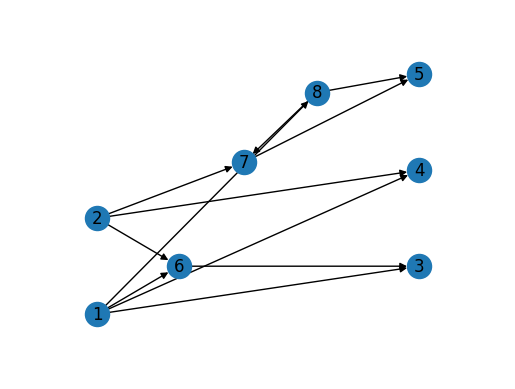

In [12]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [13]:
from NEAT.neural_network import NeuralNetwork

nn1 = NeuralNetwork(g1)
nn2 = NeuralNetwork(g1)

print(nn1.forward({1: 0.5, 2: 1.2}))
print(nn2.forward({1: 0.5, 2: 1.2}))


[0.5535297178684747, 0.8472720709357338, 0.51356299276804]
[0.5535297178684747, 0.8472720709357338, 0.51356299276804]


In [14]:
g2 = Genome(2, 3)
for i in range(20):
    g2.mutate()

In [15]:
for i in g2.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


In [16]:
list_edges2 = []
list_conn2 = []
for nodes, conn in g2.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    list_conn2.append(conn)
    if conn.Enabled:
        list_edges2.append(nodes)

(1, 3) 5.941487075328008e-05 False 1
(1, 4) 0.04299776000000001 True 2
(1, 5) 0.018601531886665752 False 3
(2, 3) 0.7644000000000003 True 4
(2, 4) 0.20527158951936017 False 5
(2, 5) 0.0004895592838456326 True 6


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT


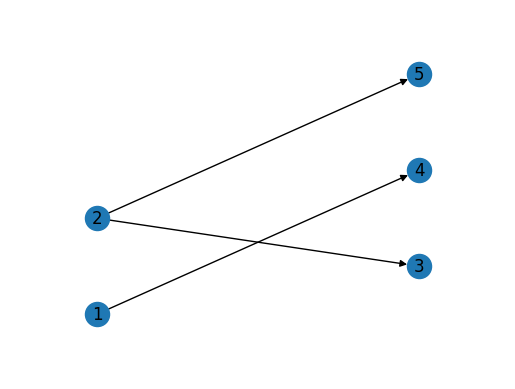

In [17]:
left_nodes2 = []
middle_nodes2 = []
right_nodes2 = []

for i in g2.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes2.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes2.append(i.id)
    else:   # OUTPUT
        right_nodes2.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes2)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes2)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes2)})

G2 = nx.DiGraph()
G2.add_edges_from(list_edges2)
nx.draw_networkx(G2, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [18]:
nn = NeuralNetwork(g2)

print(nn.forward({1: 0.5, 2: 1.2}))

[0.7144875629344137, 0.5053745129924446, 0.5001468677809298]


In [19]:
from NEAT.species import Species

g1.fitness = 1
g2.fitness = 0.5

gens = [g1, g2]

In [20]:
s = Species(.5, gens, 1, 1, 1)
offspring: Genome = s.cross_over(g1, g2)

In [21]:
for i in offspring.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


In [22]:
list_edges3 = []
for nodes, conn in offspring.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges3.append(nodes)

(8, 7) -0.8690220000000002 True 21
(1, 8) 0.08121600000000005 True 20
(2, 7) 0.11733120000000007 True 19
(1, 6) 0.0014529715200000011 True 18
(6, 3) -0.33 True 17
(8, 5) 0.058240000000000014 True 14
(7, 5) -0.024500000000000008 True 10
(2, 6) -2.5614891429120033e-05 True 7
(2, 5) 0.17424477964192284 False 6
(2, 4) 0.8466357947596802 True 5
(2, 3) 0.08767500000000011 False 4
(1, 5) -0.2552992340566672 False 3
(1, 4) -0.05073735680000004 True 2
(1, 3) 0.19002970743537664 True 1


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN
8 HIDDEN


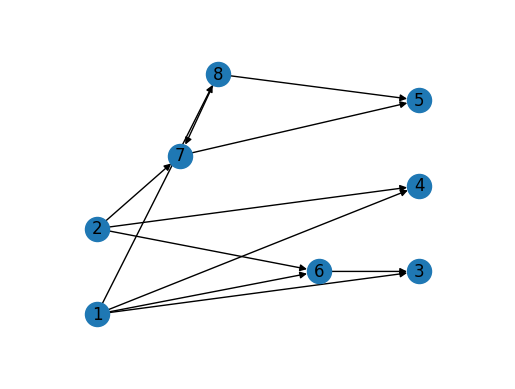

In [23]:
left_nodes3 = []
middle_nodes3 = []
right_nodes3 = []

for i in offspring.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes3.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes3.append(i.id)
    else:   # OUTPUT
        right_nodes3.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes3)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes3)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes3)})

G3 = nx.DiGraph()
G3.add_edges_from(list_edges3)
nx.draw_networkx(G3, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [24]:
nn = NeuralNetwork(offspring)

print(nn.forward({1: 0.5, 2: 1.2}))

[0.5062427526390957, 0.7292052868688509, 0.5048248979012143]
